In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

from config import DATA_DIR

In [7]:
IMG_NAME = "317947"
IMG_FP = DATA_DIR.joinpath(f"{IMG_NAME}.jpg")
print(f"Image file path: {IMG_FP}")

Image file path: C:\Users\punit\projects\research\clotscape\data\317947.jpg


In [8]:
# Read the CT scan image in grayscale
image = cv2.imread(str(IMG_FP), 0)

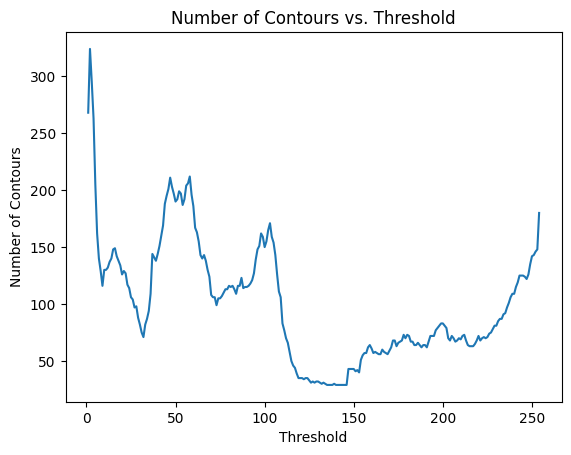

In [9]:
# Plot the number of contours against the threshold
thresholds = range(1, 255)
num_contours = []
for threshold in thresholds:
    _, thresh = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    num_contours.append(len(contours))

plt.plot(thresholds, num_contours)
plt.title('Number of Contours vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Number of Contours')
plt.show()

In [10]:
# Save the plot as a PNG
plt.savefig(f'{IMG_NAME}_contours_vs_threshold.png')

<Figure size 640x480 with 0 Axes>

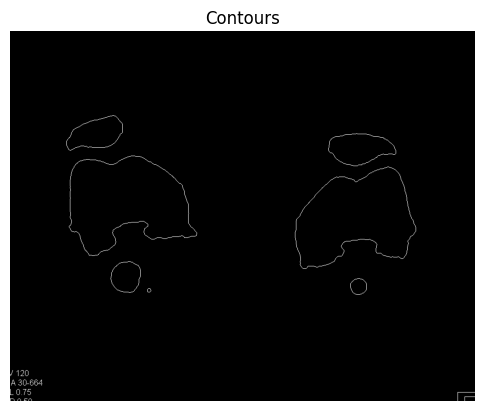

In [11]:
# Plot the contour when the number of contours is a minimum
# At this threshold the number of contours is a minimum
min_contours_threshold = thresholds[num_contours.index(min(num_contours))]
_, thresh = cv2.threshold(image, min_contours_threshold, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a black image to draw the contours on
contour_image = np.zeros_like(image)

# Draw the contours on the black image
cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 1)

# Plot the contours
plt.imshow(contour_image, cmap='gray')
plt.axis('off')
plt.title('Contours')
plt.show()

In [12]:
# Save the plot as a PNG
plt.savefig(f'{IMG_NAME}_contours.png')

<Figure size 640x480 with 0 Axes>

In [13]:
from IPython.display import HTML

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Initialize the contour image
contour_image = ax.imshow(np.zeros_like(image), cmap='gray')

# Update function for the animation
def update(threshold):
    # Threshold the image
    _, thresh = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a black image to draw the contours on
    contour_img = np.zeros_like(image)

    # Draw the contours on the black image
    cv2.drawContours(contour_img, contours, -1, (255, 255, 255), 1)

    # Update the contour image
    contour_image.set_data(contour_img)

    return [contour_image]

# Create the animation
anim = FuncAnimation(fig, update, frames=range(1, 255), interval=100, blit=True)

# Display the animation in the Jupyter Notebook
plt.close(fig)  # Close the specific figure
HTML(anim.to_jshtml())

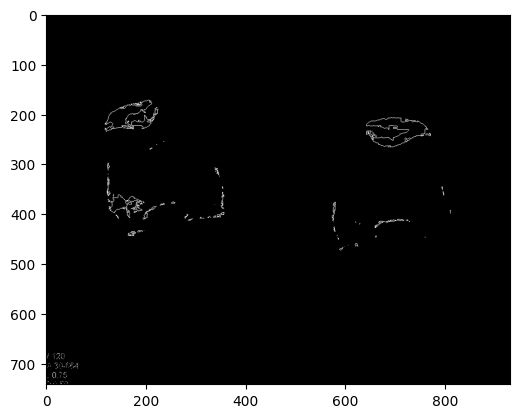

In [14]:
import matplotlib.animation as animation

# Create a figure and axis for the animation
fig, ax = plt.subplots()

# Initialize an empty list to store the contour images for each threshold
contour_images = []

# Iterate over the thresholds and generate contour images
for threshold in thresholds:
    _, thresh = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a black image to draw the contours on
    contour_image = np.zeros_like(image)

    # Draw the contours on the black image
    cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 1)

    # Append the contour image to the list
    contour_images.append([ax.imshow(contour_image, cmap='gray', animated=True)])

# Create the animation
ani = animation.ArtistAnimation(fig, contour_images, interval=50, blit=True, repeat_delay=1000)

# Save the animation as a GIF
ani.save(f'{IMG_NAME}_contours.gif', writer='pillow')

# Display the animation
plt.show()